In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Plot settings
sns.set_context('notebook') # optimises figures for notebook display
sns.set_style('ticks') # set default plot style
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(crayon) # set custom color scheme
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [3]:
cd "/Users/zhanghaonan/Desktop/SpringQuarter/423/2020-msia423-Zhang-Haonan/data"

/Users/zhanghaonan/Desktop/SpringQuarter/423/2020-msia423-Zhang-Haonan/data


In [4]:
data = pd.read_csv('Tweets.csv')

In [5]:
data=data[data['airline_sentiment']!='neutral']
data=data[data['airline_sentiment_confidence']==1.0]

In [6]:
len(data)

8897

In [7]:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from num2words import num2words

In [8]:
Tokenizer = TweetTokenizer()

In [9]:
import string


In [10]:
def process_text(text):
    tokenized = Tokenizer.tokenize(text)
    punctuation = list(string.punctuation)
    punctuation.remove('!')
    tokenized_no_punctuation=[word.lower() for word in tokenized if word not in punctuation]
    tokenized_no_stopwords=[word for word in tokenized_no_punctuation if word not in stopwords.words('english')]
    tokens = [PorterStemmer().stem(word) for word in tokenized_no_stopwords if word != '️']
    for i in range(len(tokens)):
        try:
            tokens[i]=num2words(tokens[i])
        except:
            pass
        
    return tokens


In [11]:
data['tokens']=data['text'].apply(process_text)

In [12]:
data['positive']=(data['airline_sentiment']=='positive').astype(int)

In [13]:
data = data[["airline","tokens","airline_sentiment","positive"]]

In [16]:
#data

In [17]:
def process_text(text):
    Tokenizer = TweetTokenizer()
    tokenized = Tokenizer.tokenize(text)
    punctuation = list(string.punctuation)
    punctuation.remove('!')
    tokenized_no_punctuation=[word.lower() for word in tokenized if word not in punctuation]
    tokenized_no_stopwords=[word for word in tokenized_no_punctuation if word not in stopwords.words('english')]
    tokens = [PorterStemmer().stem(word) for word in tokenized_no_stopwords if word != '️']
    for i in range(len(tokens)):
        try:
            tokens[i]=num2words(tokens[i])
        except:
            pass
        
    return tokens

In [18]:
def clean(data):
    """ This functio will return the clean dataset including token feature columns
    Args:
        data (:py:class:`pandas.DataFrame`): DataFrame of the original dataset
    
    Return:
        data (:py:class:`pandas.DataFrame`): DataFrame that is ready for feature generation
    """
    ## filter out neutral class
    data=data[data['airline_sentiment']!='neutral']
    data=data[data['airline_sentiment_confidence']==1.0]
    ## define tokenizer
  #  Tokenizer = TweetTokenizer()
    
    ## call process_text helper function
    data['tokens']=data['text'].apply(process_text)
    ## convert the class as integer
    data['positive']=(data['airline_sentiment']=='positive').astype(int)
    ## define the final data for processing
    data = data[["airline","tokens","airline_sentiment","positive"]]
    return data
    
    
    
    

In [35]:
#data1 = clean(data)

In [21]:
from sklearn.model_selection import train_test_split

# Randomly split indexes
index_train, index_test  = train_test_split(np.array(data.index), train_size=0.7, 
                                            random_state=1, stratify=data['positive'])

# Write training and test sets 
train = data.loc[index_train,:].copy()
test =  data.loc[index_test,:].copy()

In [22]:
train['airline_sentiment'].value_counts()

negative    5167
positive    1060
Name: airline_sentiment, dtype: int64

In [23]:
train['airline_sentiment'].value_counts(normalize=True).round(3)

negative    0.83
positive    0.17
Name: airline_sentiment, dtype: float64

In [24]:
table = pd.crosstab(train['airline_sentiment'], train['airline'])
table

airline,American,Delta,Southwest,US Airways,United,Virgin America
airline_sentiment,,,,,,
negative,1133,494,620,1351,1483,86
positive,160,235,261,126,204,74


In [25]:
table = pd.crosstab(train['airline_sentiment'], train['airline'], normalize='columns').round(3)
table

airline,American,Delta,Southwest,US Airways,United,Virgin America
airline_sentiment,,,,,,
negative,0.876,0.678,0.704,0.915,0.879,0.538
positive,0.124,0.322,0.296,0.085,0.121,0.462


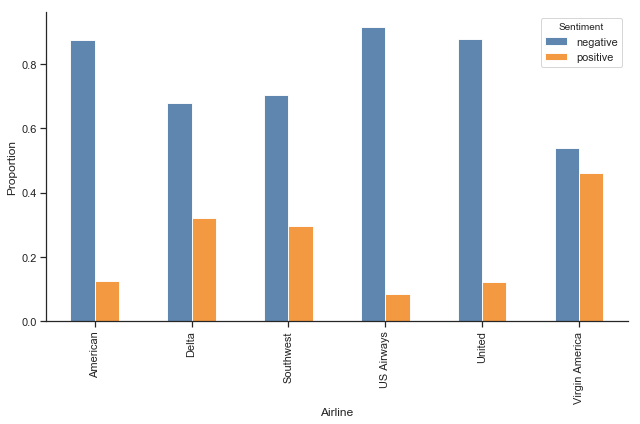

In [26]:
fig, ax = plt.subplots()
(table.T).plot(kind='bar', alpha=0.9, ax=ax)
ax.set_xlabel('Airline')
ax.set_ylabel('Proportion')
ax.legend_.set_title('Sentiment')
plt.tight_layout()
sns.despine()
plt.show()

In [27]:
### identify the most common tokens

fdist = nltk.FreqDist()
for words in train['tokens']:
    for word in words:
            fdist[word] += 1

print(f'Number of unique tokens: {len(fdist)}')

Number of unique tokens: 7808


In [28]:
fdist.most_common()[:20]

[('!', 2554),
 ('flight', 2330),
 ('@unit', 1727),
 ('@usairway', 1528),
 ('@americanair', 1391),
 ('@southwestair', 895),
 ('thank', 749),
 ('hour', 746),
 ('@jetblu', 740),
 ('get', 737),
 ('servic', 584),
 ('delay', 579),
 ('cancel', 576),
 ('custom', 558),
 ('two', 512),
 ('time', 510),
 ('help', 462),
 ('call', 459),
 ('wait', 442),
 ('...', 442)]

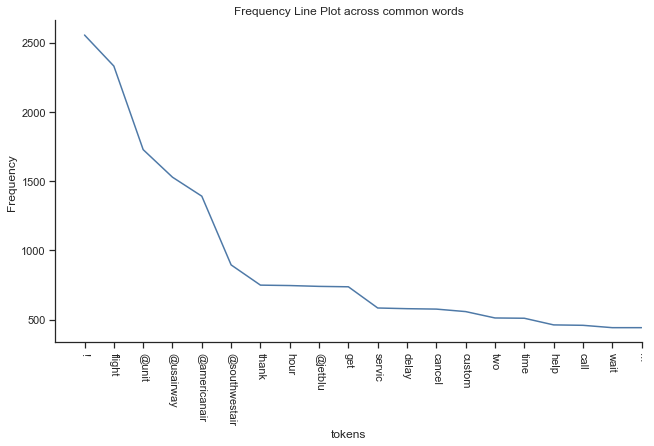

In [29]:
fig, ax = plt.subplots()

y = pd.Series(dict(fdist.most_common()[:20]))
y = y.sort_values(ascending=False)

y.plot()

indexes = np.arange(0, len(y)) # we will place ticks for every word
ax.set_xticks(indexes)
ax.set_xticklabels(y.index, rotation='-90')
ax.set_xlim(-1)

plt.tight_layout()
plt.xlabel("tokens")
plt.ylabel("Frequency")
plt.title("Frequency Line Plot across common words")
sns.despine()
plt.show()

In [30]:

### define positive token features
positives=len(train[train['airline_sentiment']=='positive']) # number of positive tweets in the training data

fdist_positive = nltk.FreqDist()
for words in train[train['airline_sentiment']=='positive']['tokens']:
    for word in np.unique(words): # not counting repeated words this time
            fdist_positive[word] += 1

            
common_positive = pd.Series(dict(fdist_positive))/positives 
common_positive = common_positive.sort_values(ascending=False)

In [31]:
common_positive

!                  0.591509
thank              0.491509
@southwestair      0.248113
@jetblu            0.221698
@unit              0.193396
                     ...   
re-accommod        0.000943
kerri              0.000943
protect            0.000943
#rais              0.000943
#loveisintheair    0.000943
Length: 2361, dtype: float64

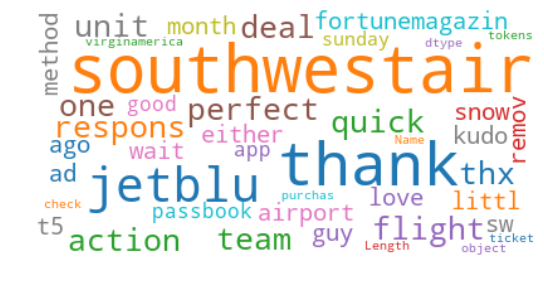

In [40]:
positive_tweets = train[train['airline_sentiment']=='positive']['tokens']

from wordcloud import WordCloud

fig, ax = plt.subplots()
wordcloud = WordCloud(background_color="white", colormap='tab10', max_words=200).generate(str(positive_tweets))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
positive_tweets

4477    [@southwestair, thank, team, deal, flight, one...
4407    [@southwestair, thx, quick, respons, action, !...
3301                        [@unit, perfect, !, thank, !]
5981    [@southwestair, @fortunemagazin, love, sw, for...
4382    [@southwestair, airport, snow, remov, method, ...
                              ...                        
5740    [@southwestair, thank, !, can't, wait, either,...
8912    [@jetblu, t5, littl, month, ago, @jetblu, guy,...
5122    [@southwestair, kudo, ad, #passbook, app, !, l...
7506                    [@jetblu, thank, !, good, sunday]
152     [@virginamerica, thank, check, ticket, purchas...
Name: tokens, Length: 1060, dtype: object

In [34]:
negatives=len(train[train['airline_sentiment']=='negative'])

fdist_negative = nltk.FreqDist()
for words in train[train['airline_sentiment']=='negative']['tokens']:
    for word in np.unique(words): 
            fdist_negative[word] += 1

common_negative = pd.Series(dict(fdist_negative))/negatives
common_negative = common_negative.sort_values(ascending=False)
common_negative.head(20).round(3)

flight           0.319
@unit            0.291
@usairway        0.268
@americanair     0.236
!                0.178
hour             0.133
get              0.123
@southwestair    0.122
cancel           0.104
delay            0.101
@jetblu          0.097
servic           0.093
custom           0.092
two              0.086
time             0.082
hold             0.080
wait             0.076
call             0.076
help             0.072
...              0.069
dtype: float64

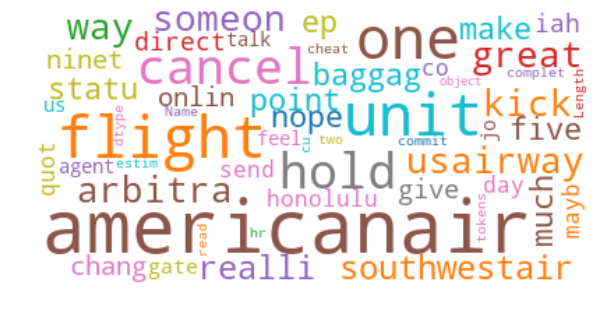

In [35]:
negative_tweets = train[train['airline_sentiment']=='negative']['tokens']

from wordcloud import WordCloud
fig, ax = plt.subplots(figsize=(10,8))
wordcloud = WordCloud(background_color="white", colormap='tab10', max_words=200).generate(str(negative_tweets))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
### discriminative tokens
vocab = pd.Series(dict(fdist))
vocab = vocab.sort_values(ascending=False)
vocab.head()

In [ ]:
#pd.DataFrame(vocab)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import log_loss 

# Builds a dummy variable for the presence of the token
def design_matrix(token, series):
    X = series.apply(lambda tokens: (token in tokens))
    X = X.astype(int) 
    return X.values.reshape((-1,1)) # converting to a NumPy matrix, as required

# Computes the training error from using a single token
def training_error(feature):
    X_train = design_matrix(feature, train['tokens'])
    nbc= BernoulliNB().fit(X_train, np.ravel(y_train))
    prob = nbc.predict_proba(X_train)[:,1]
    return log_loss(y_train, prob)

In [ ]:
y_train=train['positive'].values

losses=[]
for feature in vocab.index[:500]:
    losses.append(training_error(feature))

ranked = pd.Series(losses, index=vocab.index[:500])
ranked = ranked.sort_values()
ranked.head(20)

In [ ]:
## feature engineering
## bag-of-words binary
vocab.describe().round(0)
vocab = vocab[vocab >= 5]

In [ ]:
from scipy.sparse import csr_matrix

def design_matrix_binary(vocab, series):
    X = csr_matrix((len(series),len(features))) # initialise 
    for i in range(len(series)): 
        tokens = series.iloc[i]
        for j, token in enumerate(features): # scan the vocabulary
            if token in tokens: # if the feature is among the tokens, 
                X[i, j]= 1.0
    return X

In [ ]:
vocab

In [ ]:
### bag of words counts
from sklearn.feature_extraction.text import CountVectorizer

text_train = list(train['tokens'].apply(lambda x: ' '.join(x)))
text_test = list(test['tokens'].apply(lambda x: ' '.join(x)))
vectoriser = CountVectorizer(min_df = 5, tokenizer = lambda s: s.split(' '))
X_train_count = vectoriser.fit_transform(text_train)
X_test_count = vectoriser.transform(text_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(min_df = 5, tokenizer = lambda s: s.split(' '))
X_train_tf = vectoriser.fit_transform(text_train)
X_test_tf = vectoriser.transform(text_test)

In [ ]:
X_train_tf

In [ ]:
pd.DataFrame(X_test_tf)

In [ ]:
vectoriser = CountVectorizer(min_df = 5, ngram_range = (1,2), tokenizer = lambda s: s.split(' '))
X_train_ngram = vectoriser.fit_transform(text_train)
X_test_ngram = vectoriser.transform(text_test)

In [36]:
#pd.DataFrame(X_train_tf)


def split_data(data,train_size, random_state):
    """This function split the train and test data
    Args:
        data (:py:class:`pandas.DataFrame`): the dataframe including features and labelthat are cleaned and tokenized
        train_size (float): 
    
    """
    
    # Randomly split indexes
    try:
        index_train, index_test  = train_test_split(np.array(data.index), train_size=train_size, 
                                                random_state=random_state, stratify=data['positive'])
    except Exception as e:
        logger.error(e)
        logger.error("Fail to split the original data and check the original data dimensions")
    
    # Write training and test sets 
    train = data.loc[index_train,:].copy()
    test =  data.loc[index_test,:].copy()
    # save the train csv
  #  train.to_csv(train_save_path)
    ##test data will be saved by user defined directory
    return train, test
    
    

In [37]:
train_new, test_new = split_data(data1,train_size=0.7,random_state=1)

name 'train_test_split' is not defined
Fail to split the original data and check the original data dimensions


UnboundLocalError: local variable 'index_train' referenced before assignment

In [ ]:
y_train=train['positive'].values

In [25]:
import logging

In [26]:
logger = logging.getLogger(__name__)

In [ ]:
def featurize(train,test, method, min_df=5,**kwargs):
    """This function allows user to specify either bag-of-words-counts
    or tf-idf method for creating text features
    Args:
        data: 
    
    
    """
    print(min_df)
    train = list(train["tokens"].apply(lambda x: " ".join(x)))
    test = list(test["tokens"].apply(lambda x: " ".join(x)))
    try:
        if method == "tf-idf":
            vectoriser = TfidfVectorizer(min_df = min_df, tokenizer = lambda s: s.split(' '))
        elif method == "bag-of-words":
            vectoriser = CountVectorizer(min_df = min_df, tokenizer = lambda s: s.split(' '))
        else:
            print("invalid")

    except Exception as e:
        logger.error(e)
        logger.error("Fail to specify text processing method. Either tf-idf or bag-of-words")
    
    X_train = vectoriser.fit_transform(train)
    X_test = vectoriser.fit_transform(test)    
    
    return X_train, X_test
  
    

In [ ]:
featurize(train,test,"tf-idf")

In [ ]:
X_train

In [ ]:
featurize(test,"tf-idf")

In [ ]:
y_train = train.positive

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [ ]:
logit_l2= LogisticRegressionCV(Cs = 50, penalty='l2', solver='lbfgs', scoring='neg_log_loss')
logit_l2.fit(X_train, y_train)
logit_l2 = LogisticRegression(C = logit_l2.C_[0], penalty='l2', solver='lbfgs')
logit_l2.fit(X_train, y_train)


In [ ]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def train_model_logistic(data, transformed_feature , target_column, fitIntercept, penalty, save_tmo):
    """This function will train the logistic regression model by training data
    Args: 
        data (:py:class:`pandas.DataFrame` or :py:class:`numpy.Array`): Training data
        transformed_feature (class 'numpy.float64') : sparse matrix of text features importance indicator
        target_column (str): column name of target
        fitIntercept (boolean) : boolean to indicate whether to fit intercept
        penalty (str) : either "l1" or "l2"
        save_tmo (str): Path to save the trained model.
        **kwargs: Should contain arguments for specific requirements of model.
        
    Returns:
        logit ('sklearn.linear_model.logistic.LogisticRegression'): Logistic regression model trained.
    """
    ## fit logistic regression
    
    ### define X_train and y_train
    
    X_train = transformed_feature
    y_train = data[target_column]
    
    ## perform cross validation
    logit_l2= LogisticRegressionCV(Cs = 50, fit_intercept = fitIntercept, penalty= penalty, solver='liblinear', scoring='neg_log_loss')
    logit_l2.fit(X_train, y_train)
    
    ## Refit the model with the best complex parameter 
    logit = LogisticRegression(C = logit_l2.C_[0], penalty=penalty, solver='liblinear')
    logit.fit(X_train, y_train)
    
    # Save the trained model object
    if save_tmo is not None:
        with open(save_tmo, "wb") as f:
            pickle.dump(logit, f)
        logger.info("Trained model object saved to %s", save_tmo)

    return logit

In [ ]:

def score_model(df, transformed_feature, target_column, path_to_tmo, **kwargs):
    """Get prediction results for the test set.
    Args:
        df (:py:class:`pandas.DataFrame`): Dataframe containing data to run prediction on.(test data)
        chosen_features (list): a list of chosen features for training, same as the input for train test split
        target_column (str): name of target column
        path_to_tmo (str): Path to trained model.
        threshold (int): classify customer as churned if predicted probability above this threshold.
        save_path (str): Path to save prediction and summary results. 
    
    Returns:
        y_predicted (:py:class:`pandas.DataFrame`): DataFrame containing predicted scores.
    
    """
    ## load the model saved from previous step
    try:
        with open(path_to_tmo, "rb") as f:
            model = pickle.load(f)
    except Exception as e:
        logger.error(e)
        logger.error("Failure to load the model from the directory.")
    
    ## prepare testing features and response
    X_test = df[chosen_features]
    y_test = df[target_column]
    
    ## generate prediction with handling wrong/inconsistent input of chosen features
    try:
        ypred_proba_test = model.predict_proba(X_test)[:,1]
        ypred_bin_test = model.predict(X_test)
    
    except:
        raise ValueError("Test data features dimension does not match the model training feature dimension")
        logger.error("Test data features dimension does not match the model training feature dimension")
    
    ## evaluate the performance
    auc = sklearn.metrics.roc_auc_score(y_test, ypred_proba_test)
    confusion = sklearn.metrics.confusion_matrix(y_test, ypred_bin_test)
    accuracy = sklearn.metrics.accuracy_score(y_test, ypred_bin_test)
    classification_report = sklearn.metrics.classification_report(y_test, ypred_bin_test)
    
    print("-------------- Model Performance Evaluation-------------------")
    print('AUC on test: %0.3f' % auc)
    print('Accuracy on test: %0.3f' % accuracy)
    print(pd.DataFrame(confusion,
                  index=['Actual negative','Actual positive'],
                  columns=['Predicted negative', 'Predicted positive']))
    
    ## output the prediction
    df_prediction = pd.DataFrame([ypred_proba_test,ypred_bin_test],index = ["predicted_proba","predicted_class"]).T
   # df_prediction.to_csv("test_prediction.csv")
    
    ## save metrics performance as csv
    metrics = pd.DataFrame([auc,accuracy],index =["auc","accuacy"],columns=["Evaluation Metric"])
  #  metrics.to_csv("test_metrics.csv")
    
    ## post-processing, feature importance, odd ratios
    fitted = pd.DataFrame(index=chosen_features)
    
    fitted['coefs'] = model.coef_[0]
    fitted['odds_ratio'] = fitted.coefs.apply(np.exp)
    ## sort odd ration descending 
    fitted = fitted.sort_values(by='odds_ratio', ascending=False)
 #   fitted.to_csv(save_path + "/model_inference.csv")
    
    return df_prediction, metrics, fitted
    

In [ ]:

model = RandomForestClassifier(criterion = 'entropy',  n_estimators=100)

tuning_parameters = {
    'min_samples_leaf': [1, 5, 10, 20, 50],
    'max_features': np.arange(1, X_train.shape[1]),
}

rf_search = RandomizedSearchCV(model, tuning_parameters, cv = 5, n_iter= 64, scoring='neg_log_loss', n_jobs=4)
rf_search.fit(X_train, y_train)

rf = rf_search.best_estimator_

print('Best parameters found by randomised search:', rf_search.best_params_, '\n')

In [ ]:



from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, log_loss

In [ ]:
new_feature = featurize(data,"tf-idf")

In [ ]:
test

In [ ]:
train

In [ ]:
new_feature_test = featurize(test,"tf-idf")

In [ ]:
#train_model_logistic(data,new_feature,"positive",fitIntercept = True, penalty ="l1", save_tmo = "/data")

In [ ]:
logit_l2.predict(new_feature_test)